In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

Part A — Load & basic EDA

In [2]:
#Load the CSV into a Pandas DataFrame and show the first 5 rows.
data=pd.read_excel("Online Retail.xlsx")
data_2 = pd.read_csv("Mall_Customers.csv")
data_2.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


2. Show the dataset shape (rows, columns) and column names with dtypes.

In [4]:
data.shape

(541909, 8)

In [5]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


3. Count unique values per column and list the top 10 most frequent values in a categorical field

In [7]:
data.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [8]:
data.select_dtypes(include="object").mode()


,InvoiceNo,StockCode,Description,Country
0,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom


In [9]:
top_10_values = data["Description"].value_counts().head(10)
print(top_10_values)

Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
Name: count, dtype: int64


In [10]:
top_10_values = data["Description"].value_counts().head(10)
print(top_10_values)

Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
Name: count, dtype: int64


In [11]:
top_10_values = data["InvoiceNo"].value_counts().head(10)
print(top_10_values)

InvoiceNo
573585    1114
581219     749
581492     731
580729     721
558475     705
579777     687
581217     676
537434     675
580730     662
538071     652
Name: count, dtype: int64


In [12]:
top_10_values = data["StockCode"].value_counts().head(10)
print(top_10_values)

StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
84879     1502
22720     1477
22197     1476
21212     1385
20727     1350
Name: count, dtype: int64


In [13]:
top_10_values = data["Country"].value_counts().head(10)
print(top_10_values)

Country
United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         2002
Portugal            1519
Australia           1259
Name: count, dtype: int64


4. Find missing values per column and report counts.

In [14]:
data.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

5. Show summary statistics for numeric columns: mean, median, std, min, max, quartiles.

In [15]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


6. Convert a numeric column (e.g., Age) into bins (e.g., Young, Adult, Senior). Show counts by group

In [17]:
data_2['Age_groups'] = np.where(data_2["Age"] <=20, "Young", np.where(data_2["Age"] >= 60, "Senior", "MiddleAged"))
data_2.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Age_groups
0,1,Male,19,15,39,Young
1,2,Male,21,15,81,MiddleAged
2,3,Female,20,16,6,Young
3,4,Female,23,16,77,MiddleAged
4,5,Female,31,17,40,MiddleAged
5,6,Female,22,17,76,MiddleAged
6,7,Female,35,18,6,MiddleAged
7,8,Female,23,18,94,MiddleAged
8,9,Male,64,19,3,Senior
9,10,Female,30,19,72,MiddleAged


In [18]:
unrealistic = data[data["UnitPrice"] <= 0]

count_unrealistic = (data["UnitPrice"] <= 0).sum()
print(count_unrealistic)

2517


In [19]:
data = data[data["UnitPrice"] > 0]

In [20]:
bins = [0, 2, 4, float("inf")]
labels = ['Cheap', 'Affordable', 'Expensive']
data['UnitPriceCategory'] = pd.cut(data['UnitPrice'], bins=bins, labels=labels, right=False)
print(data[['UnitPrice', 'UnitPriceCategory']].tail())

        UnitPrice UnitPriceCategory
541904       0.85             Cheap
541905       2.10        Affordable
541906       4.15         Expensive
541907       4.15         Expensive
541908       4.95         Expensive


7. Detect and count any unrealistic values (e.g., negative or zero values).

In [21]:
print((data["UnitPrice"] < 0).sum())
#data.dropna(subset=['UnitPrice'])

0


In [22]:
unrealistic = data[data["Quantity"] <= 0]

count_unrealistic = (data["Quantity"] <= 0).sum()
print(count_unrealistic)

9288


In [23]:
data = data[data["Quantity"] > 0]


In [24]:
unrealistic = data[data["Quantity"] <= 0]
print(unrealistic)

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, UnitPriceCategory]
Index: []


8. Find how many unique customers exist and which group/category is most common

In [25]:
unique_customer = data["CustomerID"].nunique()
print(unique_customer)

4338


In [26]:
unique_customer_count = data["CustomerID"].value_counts()
print(unique_customer_count)

CustomerID
17841.0    7847
14911.0    5675
14096.0    5111
12748.0    4595
14606.0    2700
           ... 
17443.0       1
14424.0       1
13703.0       1
18084.0       1
15070.0       1
Name: count, Length: 4338, dtype: int64


### Part B — Data cleaning & filtering

9. Remove rows with missing values in a key column and explain the pros/cons.


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   InvoiceNo          530104 non-null  object        
 1   StockCode          530104 non-null  object        
 2   Description        530104 non-null  object        
 3   Quantity           530104 non-null  int64         
 4   InvoiceDate        530104 non-null  datetime64[ns]
 5   UnitPrice          530104 non-null  float64       
 6   CustomerID         397884 non-null  float64       
 7   Country            530104 non-null  object        
 8   UnitPriceCategory  530104 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.9+ MB


In [28]:
data = data.dropna(subset=['Description'])

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   InvoiceNo          530104 non-null  object        
 1   StockCode          530104 non-null  object        
 2   Description        530104 non-null  object        
 3   Quantity           530104 non-null  int64         
 4   InvoiceDate        530104 non-null  datetime64[ns]
 5   UnitPrice          530104 non-null  float64       
 6   CustomerID         397884 non-null  float64       
 7   Country            530104 non-null  object        
 8   UnitPriceCategory  530104 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.9+ MB


10. Drop duplicate rows and report how many were dropped.

In [30]:
data.duplicated().sum()

np.int64(5226)

In [31]:
data=data.drop_duplicates()
print(data)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0     

In [32]:
data.duplicated().sum()

np.int64(0)

In [33]:
data_2 = pd.read_csv("Mall_Customers.csv")
data_2.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


11. Filter out records where Age < 18.


In [34]:
data_2 = data_2[data_2["Age"] >= 18]

In [35]:
data_2.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [36]:
data.head

<bound method NDFrame.head of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Custom

In [37]:
data.tail(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,UnitPriceCategory
541894,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France,Cheap
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France,Cheap
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France,Cheap
541897,581587,22728,ALARM CLOCK BAKELIKE PINK,4,2011-12-09 12:50:00,3.75,12680.0,France,Affordable
541898,581587,22727,ALARM CLOCK BAKELIKE RED,4,2011-12-09 12:50:00,3.75,12680.0,France,Affordable
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,12680.0,France,Affordable
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France,Affordable
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France,Cheap
541902,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France,Cheap
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680.0,France,Expensive


In [38]:
data["UnitPrice"].max()

13541.33

In [39]:
data["UnitPrice"].min()

0.001

In [40]:
data["UnitPrice"].mean()

np.float64(3.9225725673394587)

### Create a new categorical column from numeric data using conditional statements.

In [41]:
bins = [0, 2, 4, float("inf")]
labels = ['Cheap', 'Affordable', 'Expensive']
data['UnitPriceCategory'] = pd.cut(data['UnitPrice'], bins=bins, labels=labels, right=False)
print(data[['UnitPrice', 'UnitPriceCategory']].tail())

        UnitPrice UnitPriceCategory
541904       0.85             Cheap
541905       2.10        Affordable
541906       4.15         Expensive
541907       4.15         Expensive
541908       4.95         Expensive


In [42]:
data["UnitPriceCategory"].value_counts()

UnitPriceCategory
Cheap         246371
Expensive     140029
Affordable    138478
Name: count, dtype: int64

In [43]:
data_2['Age_groups'] = np.where(data_2["Age"] <=20, "Young", np.where(data_2["Age"] >= 60, "Senior", "MiddleAged"))
data_2.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Age_groups
0,1,Male,19,15,39,Young
1,2,Male,21,15,81,MiddleAged
2,3,Female,20,16,6,Young
3,4,Female,23,16,77,MiddleAged
4,5,Female,31,17,40,MiddleAged
5,6,Female,22,17,76,MiddleAged
6,7,Female,35,18,6,MiddleAged
7,8,Female,23,18,94,MiddleAged
8,9,Male,64,19,3,Senior
9,10,Female,30,19,72,MiddleAged


Replace missing values in a numeric column with the mean.

In [44]:
data['CustomerID'] = data['CustomerID'].fillna(data["CustomerID"]).mean()
data.isnull().sum()

InvoiceNo            0
StockCode            0
Description          0
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID           0
Country              0
UnitPriceCategory    0
dtype: int64

In [45]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
 5   Age_groups              200 non-null    object
dtypes: int64(4), object(2)
memory usage: 9.5+ KB


Bucket customers into categories based on quantiles (e.g., spending level).

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524878 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   InvoiceNo          524878 non-null  object        
 1   StockCode          524878 non-null  object        
 2   Description        524878 non-null  object        
 3   Quantity           524878 non-null  int64         
 4   InvoiceDate        524878 non-null  datetime64[ns]
 5   UnitPrice          524878 non-null  float64       
 6   CustomerID         524878 non-null  float64       
 7   Country            524878 non-null  object        
 8   UnitPriceCategory  524878 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.5+ MB


In [47]:
bins = [0, 25, 50, 75, 100]
labels = ["Very Low", "Low", "High", "Very High"]
data_2["Spending_Habit"] = pd.cut(data_2['Spending Score (1-100)'], bins=bins, labels=labels, right=False)
print(data_2.tail())

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Age_groups Spending_Habit  
195  MiddleAged      Very High  
196  MiddleAged            Low  
197  MiddleAged           High  
198  MiddleAged       Very Low  
199  MiddleAged      Very High  


In [48]:
data_2.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Age_groups,Spending_Habit
0,1,Male,19,15,39,Young,Low
1,2,Male,21,15,81,MiddleAged,Very High
2,3,Female,20,16,6,Young,Very Low
3,4,Female,23,16,77,MiddleAged,Very High
4,5,Female,31,17,40,MiddleAged,Low


Explain and apply feature scaling to numeric features.

In [49]:
num_cols = pd.DataFrame(data_2.select_dtypes(include=['number']))
num_cols.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [50]:
x = num_cols.drop(num_cols[["CustomerID","Spending Score (1-100)"]], axis = 1)
y = num_cols['Spending Score (1-100)']

In [51]:
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x_scaled.head()

,Age,Annual Income (k$)
0,-1.424569,-1.738999
1,-1.281035,-1.738999
2,-1.352802,-1.700830
3,-1.137502,-1.700830
4,-0.563369,-1.662660


Part C — Aggregation & feature engineering (16–22)

Compute average income by gender using groupby.


In [52]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CustomerID              200 non-null    int64   
 1   Genre                   200 non-null    object  
 2   Age                     200 non-null    int64   
 3   Annual Income (k$)      200 non-null    int64   
 4   Spending Score (1-100)  200 non-null    int64   
 5   Age_groups              200 non-null    object  
 6   Spending_Habit          200 non-null    category
dtypes: category(1), int64(4), object(2)
memory usage: 9.9+ KB


In [53]:
ave_income_gender = data_2.groupby("Genre")["Annual Income (k$)"].mean()
print(ave_income_gender)

Genre
Female    59.250000
Male      62.227273
Name: Annual Income (k$), dtype: float64


Calculate max, min, and mean for numeric columns per group.

In [54]:
data_2.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [55]:
min_cols = pd.DataFrame(data_2[["Age","Annual Income (k$)","Spending Score (1-100)"]].min())
print(min_cols)

                         0
Age                     18
Annual Income (k$)      15
Spending Score (1-100)   1


In [56]:
max_cols = pd.DataFrame(data_2[["Age","Annual Income (k$)","Spending Score (1-100)"]].max())
print(max_cols)

                          0
Age                      70
Annual Income (k$)      137
Spending Score (1-100)   99


In [57]:
mean_cols = pd.DataFrame(data_2[["Age","Annual Income (k$)","Spending Score (1-100)"]].mean())
print(mean_cols)

                            0
Age                     38.85
Annual Income (k$)      60.56
Spending Score (1-100)  50.20


In [58]:
min_cols = pd.DataFrame(data_2[["Age","Annual Income (k$)","Spending Score (1-100)"]].min())
print(f"The minimum for numeric columns are {min_cols}")

print ("*" * 70)

max_cols = pd.DataFrame(data_2[["Age","Annual Income (k$)","Spending Score (1-100)"]].max())
print(f"The maximum for numeric columns are {max_cols}")

print ("*" * 70)

mean_cols = pd.DataFrame(data_2[["Age","Annual Income (k$)","Spending Score (1-100)"]].mean())
print(f"The mean for numeric columns are {mean_cols}")


The minimum for numeric columns are                          0
Age                     18
Annual Income (k$)      15
Spending Score (1-100)   1
**********************************************************************
The maximum for numeric columns are                           0
Age                      70
Annual Income (k$)      137
Spending Score (1-100)   99
**********************************************************************
The mean for numeric columns are                             0
Age                     38.85
Annual Income (k$)      60.56
Spending Score (1-100)  50.20


Create a new ratio feature (e.g., income-to-age).

In [59]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CustomerID              200 non-null    int64   
 1   Genre                   200 non-null    object  
 2   Age                     200 non-null    int64   
 3   Annual Income (k$)      200 non-null    int64   
 4   Spending Score (1-100)  200 non-null    int64   
 5   Age_groups              200 non-null    object  
 6   Spending_Habit          200 non-null    category
dtypes: category(1), int64(4), object(2)
memory usage: 9.9+ KB


In [60]:
data_2["Income_Age_ratio"] = data_2["Annual Income (k$)" ] / data_2["Age"]
print(data_2[["Income_Age_ratio","Age","Annual Income (k$)"]].head())

   Income_Age_ratio  Age  Annual Income (k$)
0          0.789474   19                  15
1          0.714286   21                  15
2          0.800000   20                  16
3          0.695652   23                  16
4          0.548387   31                  17


In [61]:
data_2.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Age_groups,Spending_Habit,Income_Age_ratio
0,1,Male,19,15,39,Young,Low,0.789474
1,2,Male,21,15,81,MiddleAged,Very High,0.714286
2,3,Female,20,16,6,Young,Very Low,0.800000
3,4,Female,23,16,77,MiddleAged,Very High,0.695652
4,5,Female,31,17,40,MiddleAged,Low,0.548387


Flag “High value” customers based on income and spending greater than average.

In [62]:
data_2["Customer_value"] = np.where((data_2["Spending Score (1-100)"] > 50.2) & (data_2["Annual Income (k$)"] > 60.56),
                                    "High Value",
                                    "Low Value"
                                    )


In [63]:
data_2.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Age_groups,Spending_Habit,Income_Age_ratio,Customer_value
0,1,Male,19,15,39,Young,Low,0.789474,Low Value
1,2,Male,21,15,81,MiddleAged,Very High,0.714286,Low Value
2,3,Female,20,16,6,Young,Very Low,0.800000,Low Value
3,4,Female,23,16,77,MiddleAged,Very High,0.695652,Low Value
4,5,Female,31,17,40,MiddleAged,Low,0.548387,Low Value


Compute correlation between numeric features.

In [64]:
corr_mat = num_cols.corr()

In [65]:
print(corr_mat)

                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


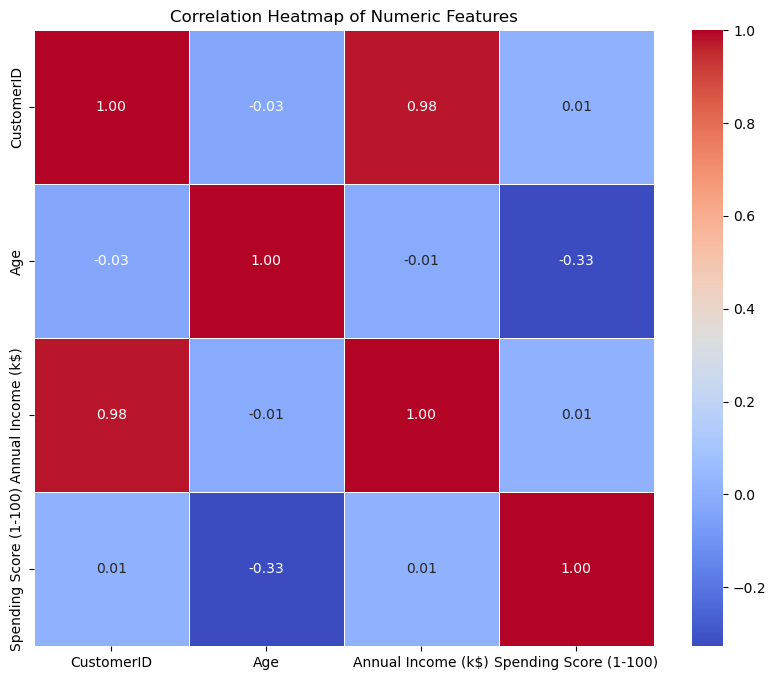

In [66]:

plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

Determine which gender has a higher average spending score.

In [67]:
high_spending_score = data_2.groupby("Genre")["Spending Score (1-100)"].mean()
print(high_spending_score)

Genre
Female    51.526786
Male      48.511364
Name: Spending Score (1-100), dtype: float64


Create a pivot table by age group and gender for average spending.

In [68]:
data_2.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Age_groups,Spending_Habit,Income_Age_ratio,Customer_value
0,1,Male,19,15,39,Young,Low,0.789474,Low Value
1,2,Male,21,15,81,MiddleAged,Very High,0.714286,Low Value
2,3,Female,20,16,6,Young,Very Low,0.800000,Low Value
3,4,Female,23,16,77,MiddleAged,Very High,0.695652,Low Value
4,5,Female,31,17,40,MiddleAged,Low,0.548387,Low Value


In [69]:
data_2["Spending_Habit"].value_counts()

Spending_Habit
Low          59
High         59
Very High    43
Very Low     39
Name: count, dtype: int64

In [70]:
avg_spending_score_gender_age = pd.DataFrame(data_2.groupby(["Genre", "Age_groups"])["Spending Score (1-100)"].mean())
print(avg_spending_score_gender_age)

                   Spending Score (1-100)
Genre  Age_groups                        
Female MiddleAged               52.020202
       Senior                   48.500000
       Young                    46.600000
Male   MiddleAged               51.109375
       Senior                   39.333333
       Young                    43.833333


#### Part D — Visualizations & group exploration

Plot a histogram of the Age distribution

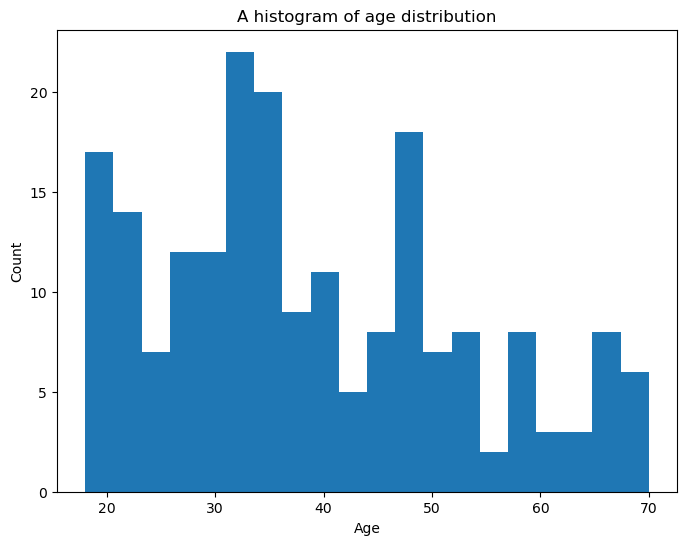

In [71]:
plt.figure(figsize = (8,6))
plt.hist(x=data_2["Age"], bins= 20)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("A histogram of age distribution")
plt.show()

Create a bar chart of average spending score by gender

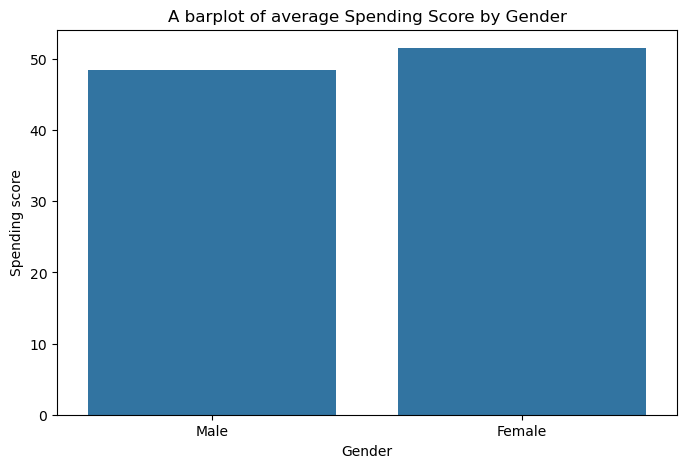

In [72]:
plt.figure(figsize=(8,5))
sns.barplot(x="Genre", y="Spending Score (1-100)", data=data_2, errorbar=None)
plt.xlabel("Gender")
plt.ylabel("Spending score")
plt.title("A barplot of average Spending Score by Gender")
plt.show()

Create a scatter plot of Annual Income vs Spending Score

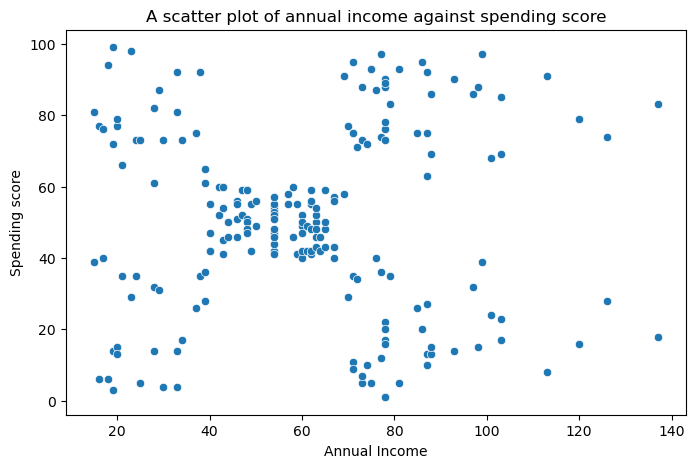

In [73]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=data_2)
plt.xlabel("Annual Income")
plt.ylabel("Spending score")
plt.title("A scatter plot of annual income against spending score")
plt.show()

In [74]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CustomerID              200 non-null    int64   
 1   Genre                   200 non-null    object  
 2   Age                     200 non-null    int64   
 3   Annual Income (k$)      200 non-null    int64   
 4   Spending Score (1-100)  200 non-null    int64   
 5   Age_groups              200 non-null    object  
 6   Spending_Habit          200 non-null    category
 7   Income_Age_ratio        200 non-null    float64 
 8   Customer_value          200 non-null    object  
dtypes: category(1), float64(1), int64(4), object(3)
memory usage: 13.0+ KB


Create a boxplot of spending score grouped by age bins.

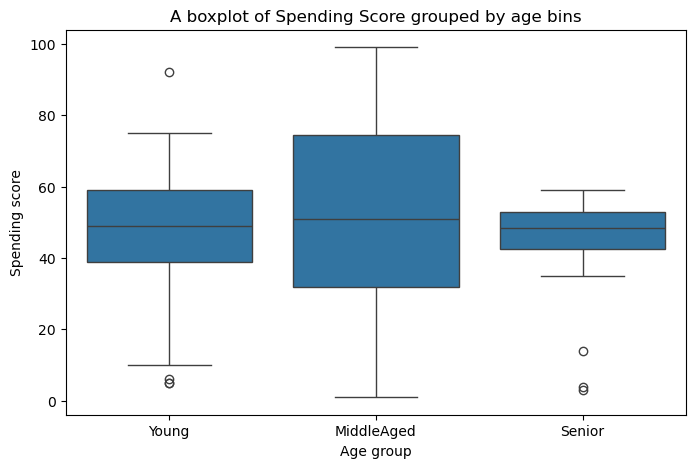

In [75]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Age_groups", y="Spending Score (1-100)", data=data_2)
plt.xlabel("Age group")
plt.ylabel("Spending score")
plt.title("A boxplot of Spending Score grouped by age bins")
plt.show()

Create a heatmap of correlations between numeric features

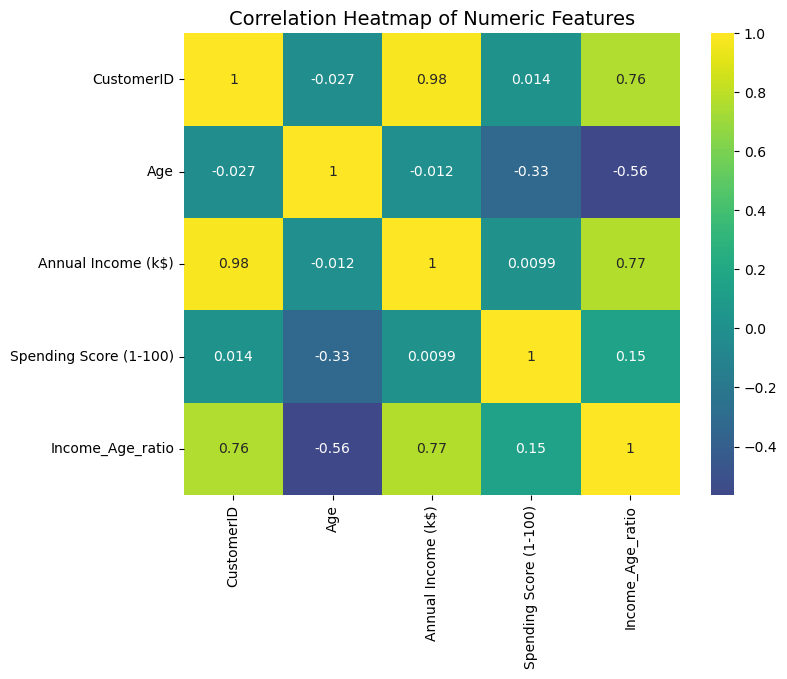

In [76]:
num_cols = pd.DataFrame(data_2.select_dtypes(include=['number']))
num_cols_corr = num_cols.corr()
plt.figure(figsize=(8,6))
sns.heatmap(num_cols_corr, annot=True, cmap="viridis", center=0)
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.show()

#### Part E — Dimensionality reduction (PCA & t-SNE)

Run PCA on standardized income and spending features and plot explained variance.

In [77]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CustomerID              200 non-null    int64   
 1   Genre                   200 non-null    object  
 2   Age                     200 non-null    int64   
 3   Annual Income (k$)      200 non-null    int64   
 4   Spending Score (1-100)  200 non-null    int64   
 5   Age_groups              200 non-null    object  
 6   Spending_Habit          200 non-null    category
 7   Income_Age_ratio        200 non-null    float64 
 8   Customer_value          200 non-null    object  
dtypes: category(1), float64(1), int64(4), object(3)
memory usage: 13.0+ KB


In [78]:
num_cols = pd.DataFrame(data_2.select_dtypes(include=['number']))
num_cols.head()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income_Age_ratio
0,1,19,15,39,0.789474
1,2,21,15,81,0.714286
2,3,20,16,6,0.800000
3,4,23,16,77,0.695652
4,5,31,17,40,0.548387


In [79]:
x = num_cols.drop(num_cols[["CustomerID"]], axis = 1)

scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x))
x_scaled.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,-1.010344
1,-1.281035,-1.738999,1.195704,-1.089296
2,-1.352802,-1.700830,-1.715913,-0.999291
3,-1.137502,-1.700830,1.040418,-1.108862
4,-0.563369,-1.662660,-0.395980,-1.263499


In [80]:
pca = PCA()
x_pca=pca.fit(x_scaled)

Text(0.5, 1.0, 'A graph showing explained variance vs the no of components')

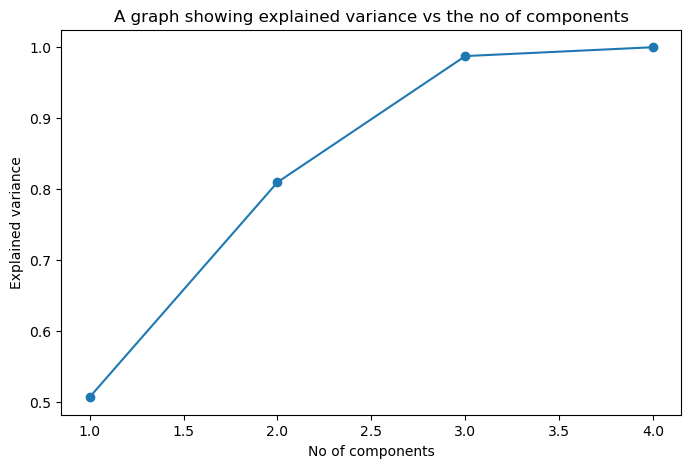

In [81]:

plt.figure(figsize=(8,5))
plt.plot(range(1,len(x_pca.explained_variance_ratio_)+1),
         x_pca.explained_variance_ratio_.cumsum(), marker="o")
plt.xlabel("No of components")
plt.ylabel("Explained variance")
plt.title("A graph showing explained variance vs the no of components")

Plot 2D PCA components scatter colored by a category (e.g., Gender)

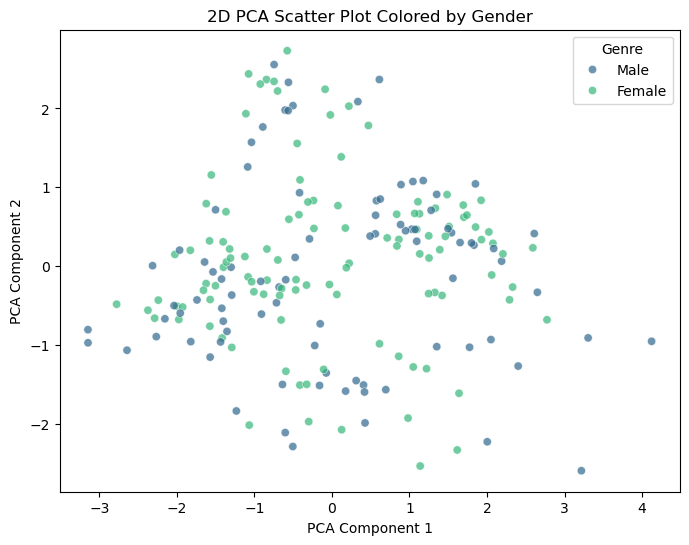

In [88]:
pca = PCA(n_components=2)
components = pca.fit_transform(x_scaled)

pca_df = pd.DataFrame(components, columns=["PCA1", "PCA2"])
pca_df["Genre"] = data_2["Genre"] 

plt.figure(figsize=(8,6))
sns.scatterplot(
    x="PCA1", 
    y="PCA2", 
    hue="Genre",  
    data=pca_df, 
    palette="viridis", 
    alpha=0.7
)

plt.title("2D PCA Scatter Plot Colored by Gender")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Genre")
plt.show()

Run t-SNE and plot the 2D embedding.

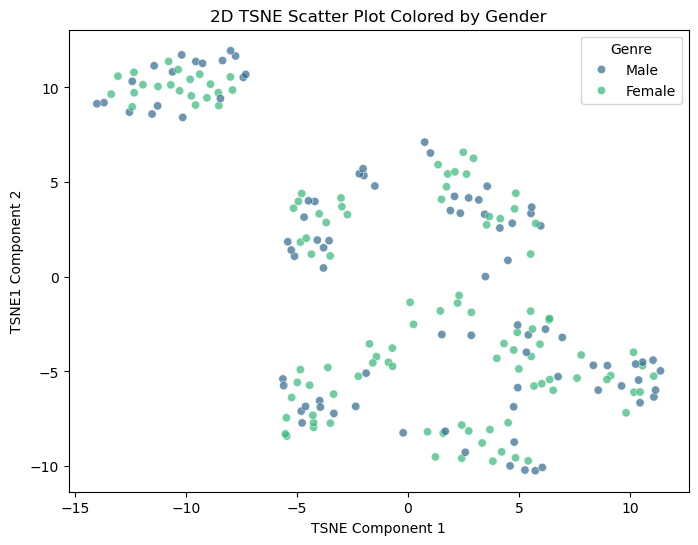

In [93]:
tsne = TSNE(n_components=2, random_state=42, max_iter=1000, perplexity=30)
tsne_result = tsne.fit_transform(x_scaled)

tsne_df = pd.DataFrame(tsne_result, columns=["TSNE1", "TSNE2"])
tsne_df["Genre"] = data_2["Genre"] 

plt.figure(figsize=(8,6))
sns.scatterplot(
    x="TSNE1", 
    y="TSNE2", 
    hue="Genre",  
    data=tsne_df, 
    palette="viridis", 
    alpha=0.7
)

plt.title("2D TSNE Scatter Plot Colored by Gender")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE1 Component 2")
plt.legend(title="Genre")
plt.show()

In [ ]:

tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
tsne_results = tsne.fit_transform(x_scaled)

tsne_df = pd.DataFrame(tsne_results, columns=["TSNE1", "TSNE2"])
tsne_df["Genre"] = data_2["Genre"] 

plt.figure(figsize=(8,6))
sns.scatterplot(
    x="TSNE1", 
    y="TSNE2", 
    hue="Genre", 
    data=tsne_df, 
    palette="viridis", 
    alpha=0.7
)

plt.title("2D t-SNE Embedding Colored by Genre")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Genre")
plt.show()


Compare PCA and t-SNE plots — which shows clearer clusters?

TSNE shows better clusters than PCA

#### Part F — Clustering & evaluation

Run k-means for k=2…10 on standardized features and plot the elbow curve.

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

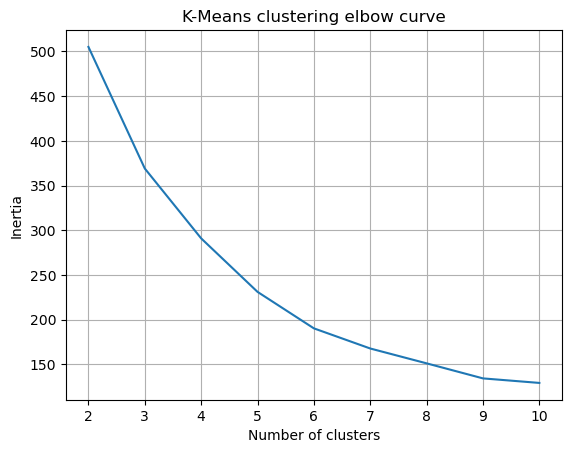

In [ ]:
inertia = []
k_values = range(2,11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

plt.Figure(figsize=(10,8))
plt.plot(k_values, inertia)
plt.title("K-Means clustering elbow curve")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.grid()
plt.show()

Compute silhouette score for each k and identify the best k

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

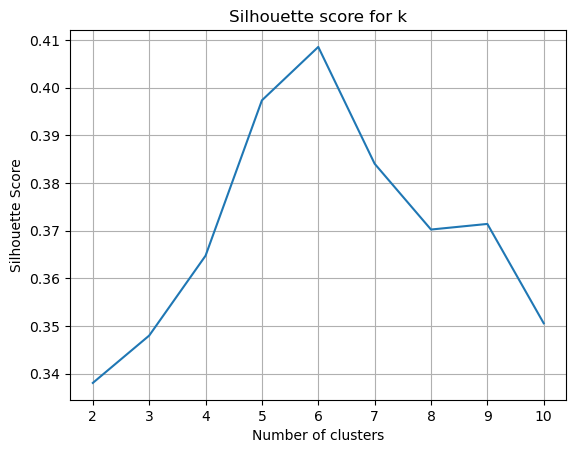

In [103]:
inertia = []
silhouette_scores = []
k_values = range(2,11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)
    score=silhouette_score(x_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.Figure(figsize=(10,8))
plt.plot(k_values, silhouette_scores)
plt.title("Silhouette score for k")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()

Plot clusters for the chosen k using a scatter plot.

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


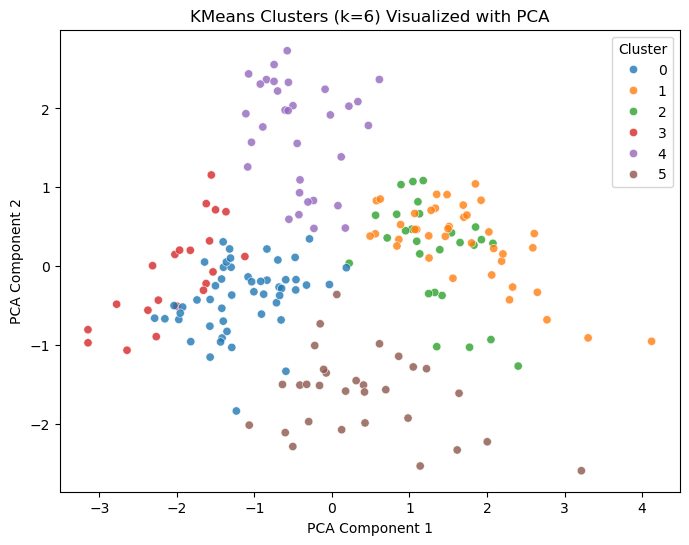

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(x_scaled)

pca = PCA(n_components=2, random_state=42)
x_pca = pca.fit_transform(x_scaled)

plot_df = pd.DataFrame(x_pca, columns=["PCA1", "PCA2"])
plot_df["Cluster"] = cluster_labels

plt.figure(figsize=(8,6))
sns.scatterplot(
    x="PCA1", y="PCA2",
    hue="Cluster",
    data=plot_df,
    palette="tab10",
    alpha=0.8
)
plt.title("KMeans Clusters (k=6) Visualized with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

Run hierarchical clustering and visualize a dendrogram

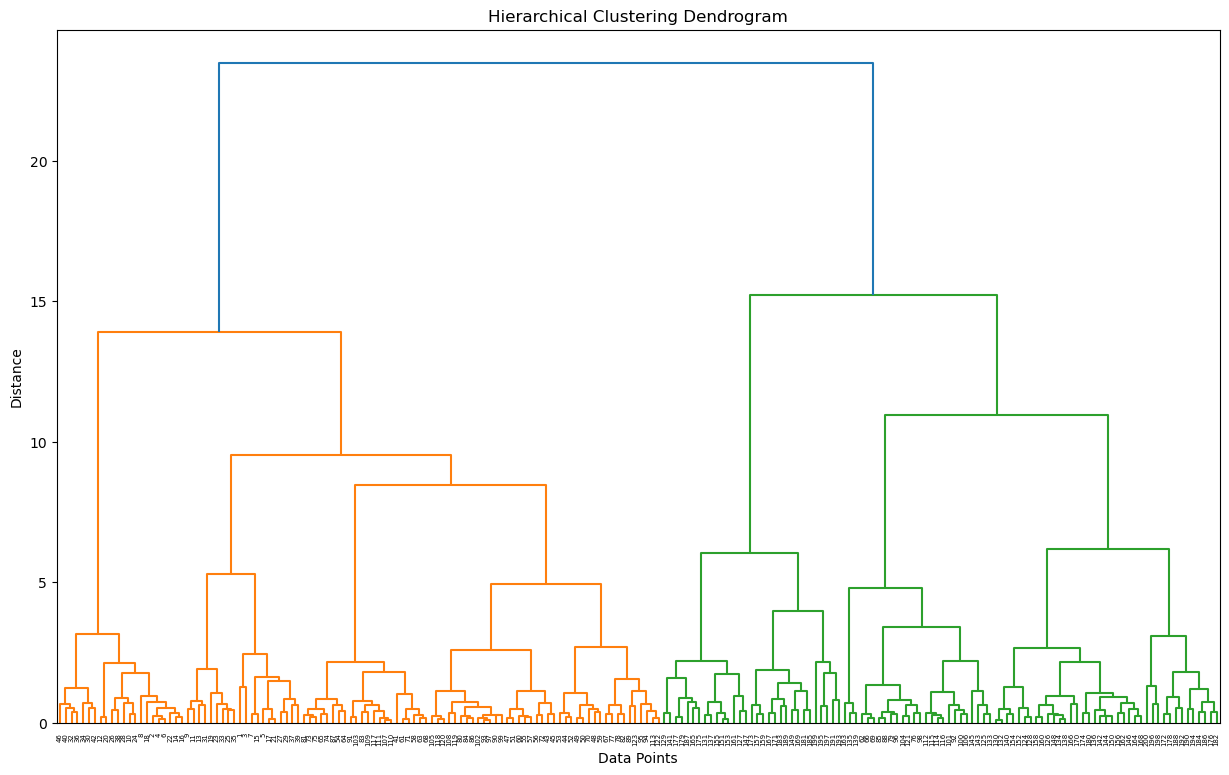

In [111]:
linked = linkage(x_scaled, method="ward")

plt.figure(figsize=(15, 9))
dendrogram(linked,
           labels=range(1, len(x_scaled)+1),
           orientation="top",
           distance_sort="ascending",
           show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

Cut the dendrogram at k clusters and compare with k-means

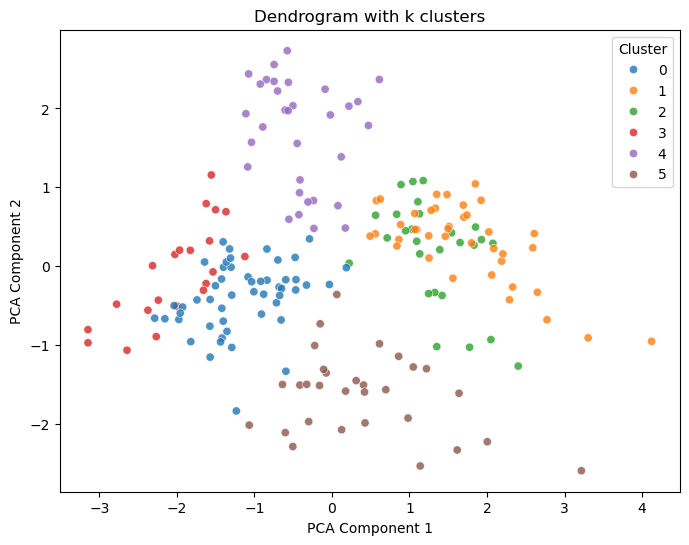

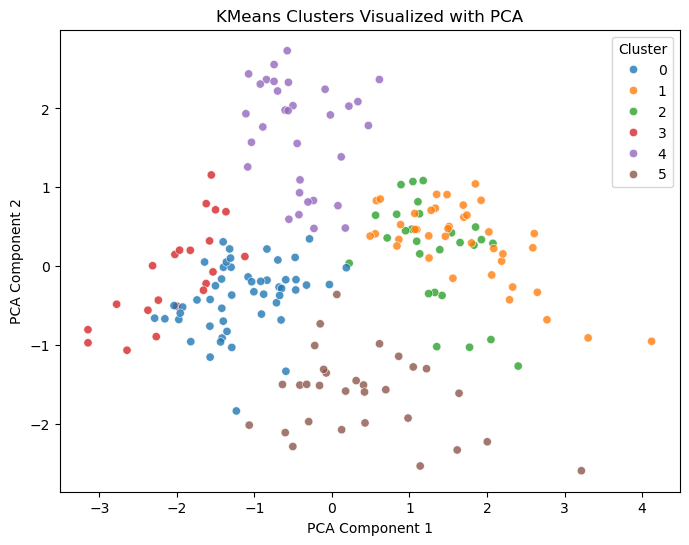

In [ ]:
pca = PCA(n_components=2, random_state=42)
x_pca = pca.fit_transform(x_scaled)

plot_df = pd.DataFrame(x_pca, columns=["PCA1", "PCA2"])
plot_df["Cluster"] = cluster_labels

model = AgglomerativeClustering(n_clusters=6, linkage="ward")
agg_cluster = model.fit_predict(x_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x="PCA1", y="PCA2",
    hue="Cluster",
    data=plot_df,
    palette="tab10",
    alpha=0.8
)
plt.title("Dendrogram with k clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()
#comparing with k-means
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="PCA1", y="PCA2",
    hue="Cluster",
    data=plot_df,
    palette="tab10",
    alpha=0.8
)
plt.title("KMeans Clusters Visualized with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

Cluster comparison (KMeans vs Dendrogram):
Dendrogram   0   1   2   3   4   5
KMeans                            
0           49   0   2   0   0   0
1            0  39   0   0   0   0
2            1   0   0   0  26   0
3            2   0   0   0   0  19
4            9   0   0  22   0   1
5            1   0  29   0   0   0


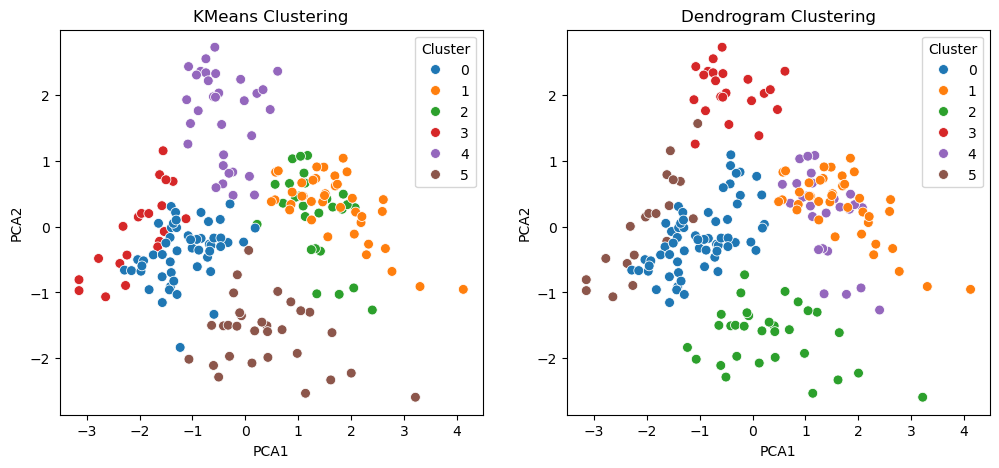

In [ ]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(x_scaled)   

agg_clust = AgglomerativeClustering(n_clusters=6, linkage='ward')
dend = agg_clust.fit_predict(x_scaled)

pca_df = pd.DataFrame(reduced, columns=["PCA1", "PCA2"])
pca_df["KMeans"] = cluster_labels      
pca_df["Dendrogram"] = dend


print("Cluster comparison (KMeans vs Dendrogram):")
print(pd.crosstab(pca_df['KMeans'], pca_df['Dendrogram']))

plt.subplot(1,2,2)
sns.scatterplot(x="PCA1", y="PCA2", hue="Dendrogram", data=pca_df, palette='tab10', s=50)
plt.title("Dendrogram Clustering")
plt.legend(title="Cluster")
plt.show()

#comparing with k-means
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x="PCA1", y="PCA2", hue="KMeans", data=pca_df, palette='tab10', s=50)
plt.title("KMeans Clustering")
plt.legend(title="Cluster")

Profile each cluster: average age, income, spending score

In [120]:
data_2["Cluster"] = cluster_labels  
cluster_profile = data_2.groupby("Cluster").agg({
    "Age": "mean",
    "Annual Income (k$)": "mean",
    "Spending Score (1-100)": "mean"
}).round(2)

print("Cluster Profiles:")
print(cluster_profile)

Cluster Profiles:
           Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                   
0        54.71               55.18                   48.27
1        32.69               86.54                   82.13
2        22.22               62.74                   42.67
3        45.52               26.29                   19.38
4        26.56               30.53                   70.28
5        43.30               90.00                   18.90


Check cluster sizes — are some clusters too small?

In [123]:
cluster_sizes = data_2["Cluster"].value_counts()
print(cluster_sizes)

Cluster
0    51
1    39
4    32
5    30
2    27
3    21
Name: count, dtype: int64


Run k-means with different random states and see if cluster assignments change.

In [125]:
random_states = [0, 21, 42, 91, 123]
assignments = []

for rs in random_states:
    km = KMeans(n_clusters=6, random_state=rs, n_init=10)
    km.fit(x_scaled)
    assignments.append(km.labels_)

# Compare each run with the first run using ARI
for i in range(1, len(assignments)):
    ari = adjusted_rand_score(assignments[0], assignments[i])
    print(f"ARI between random_state={random_states[0]} and {random_states[i]}: {ari:.2f}")

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

ARI between random_state=0 and 21: 1.00
ARI between random_state=0 and 42: 1.00
ARI between random_state=0 and 91: 0.99
ARI between random_state=0 and 123: 1.00


Export the dataset with cluster labels to CSV

In [126]:
data_2.to_csv("Customer_Segmentation.csv", index=False)